In [1]:
import numpy as np
import arviz as az
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import pymc3 as pm

In [2]:
figsize(8, 5)
count_data = np.loadtxt("example_data/days_to_event.csv")
n_count_data = len(count_data)

Text(0.5, 0, 'Number of days since purchase')

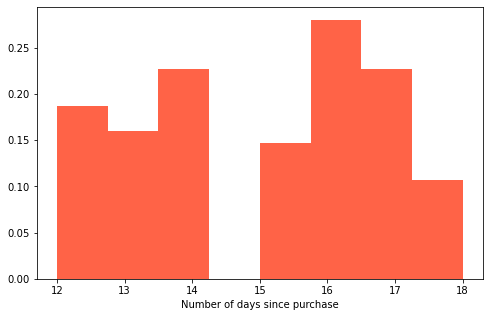

In [3]:
plt.hist(count_data, bins=8, density=True, color="#FF6347")
plt.xlabel("Number of days since purchase")

In [4]:
# alpha = 1.0/count_data.mean()
# days = np.arange(0, n_count_data)
basic_model = pm.Model()
with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Exponential("alpha", 1)
    beta = pm.Exponential("beta", 1)
    # Likelihood (sampling distribution) of observations
    observation = pm.Weibull("observation", alpha, beta, observed=count_data)

In [5]:
with basic_model:
    trace = pm.sample(10000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 17 seconds.


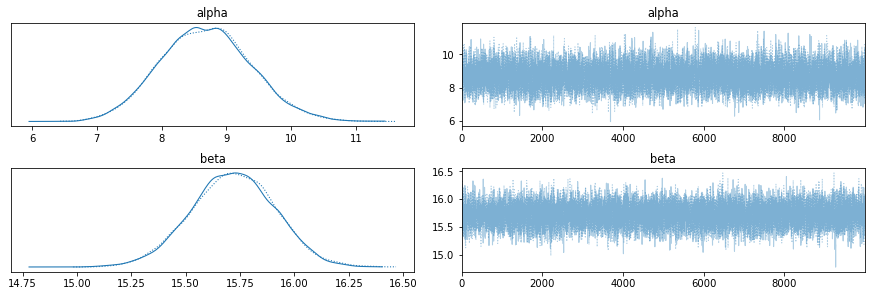

In [6]:
with basic_model:
    axes_arr = az.plot_trace(trace)
plt.draw()

In [7]:
with basic_model:
    print(az.summary(trace))

         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
alpha   8.687  0.701   7.357    9.979      0.006    0.004   13011.0  13011.0   
beta   15.717  0.193  15.361   16.083      0.002    0.001   14048.0  14048.0   

       ess_bulk  ess_tail  r_hat  
alpha   12929.0   12563.0    1.0  
beta    14075.0   12032.0    1.0  
